# MarkMark 

In [1]:
import lltk

In [2]:
# load corpus
C=lltk.load('MarkMark')

In [3]:
C.meta

,id,author,title,year,author_id,dob,dod,gender,genre,genre_confirmed,name_first,name_last,name_middle,name_title,nation,notes,num_words,ocr_accuracy,source
0,"Caldwell,_Erskine.Tobacco_Road","Caldwell, Erskine",Tobacco Road,1932,,1903,1987,M,,,Erskine,Caldwell,,,American,,69662,0.818840,
1,"Sinclair,_Upton.The_Jungle","Sinclair, Upton",The Jungle,1906,,1878,1968,M,,,Upton,Sinclair,Beall,,American,,156031,0.822785,
2,"Hemingway,_Ernest.In_Our_Time","Hemingway, Ernest Miller",In Our Time,1925,,1899,1961,M,,,Ernest,Hemingway,Miller,,American,,43243,0.812039,
3,"Hemingway,_Ernest.A_Farewell_to_Arms","Hemingway, Ernest Miller",A Farewell to Arms,1929,,1899,1961,M,,,Ernest,Hemingway,Miller,,American,,103460,0.746056,
4,"Hemingway,_Ernest.For_Whom_the_Bell_Tolls","Hemingway, Ernest Miller",For Whom the Bell Tolls,1940,,1899,1961,M,,,Ernest,Hemingway,Miller,,American,,191216,0.769099,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,"Sukenick,_Ronald.Up","Sukenick, Ronald",Up,1968,,1932,2004,M,,,Ronald,Sukenick,,,American,,114213,0.777302,
351,"Bennett,_Arnold.The_Old_Wives'_Tale","Bennett, Enoch Arnold",The Old Wives' Tale,1908,,1867,1931,M,,,Enoch,Bennett,Arnold,,English,,222095,0.782219,
352,"Robbins,_Tom.Skinny_Legs_and_All","Robbins, Tom",Skinny Legs and All,1990,,1936,,M,,,Tom,Robbins,,,American,,179211,0.795755,
353,"Donleavy,_J.P..The_Ginger_Man","Donleavy, James Patrick",The Ginger Man,1955,,1926,,M,,,James,Donleavy,Patrick,,Irish American,,116047,0.780417,


<AxesSubplot:ylabel='Density'>

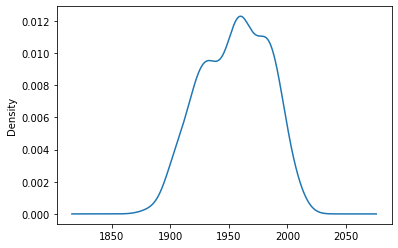

In [4]:
C.meta.year.plot.density()

<AxesSubplot:ylabel='gender'>

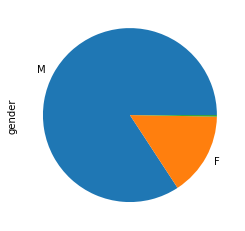

In [5]:
C.metadata.gender.value_counts().plot.pie()

<AxesSubplot:ylabel='nation'>

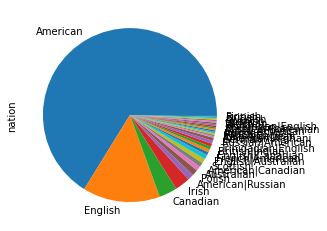

In [6]:
C.metadata.nation.value_counts().plot.pie()

In [7]:
# Top 100 words overall, as determined by `n_agg` function over `valtype`
# Then a row for each of these 100 words in each period (`keep_periods` == True) if it's in there 
mfw_df = C.mfw_df(
    n=25000,   # limit to top N words,
    yearbin = 25, # any year delimiter. set to False for no periodizing
    n_by_period=False,    # top N per period or top N overall?
)
mfw_df

,word,count,fpm,rank,ranks_avg
0,the,483873.5,53722.021439,1,1.0
1,and,289073.5,28393.976539,2,2.0
2,to,230096.5,25098.578330,3,3.0
3,of,231485.0,23693.885720,4,4.0
4,a,204226.0,22781.359241,5,5.0
...,...,...,...,...,...
24995,reduces,3.0,0.740935,24996,33604.5
24996,expire,6.5,0.740935,24997,30302.0
24997,curvature,1.5,0.740935,24998,32695.5
24998,rigorously,5.5,0.740935,24999,31506.5


,F,M
word,,
lilies,0.001713,0.000000
peas,0.001662,0.000000
petals,0.001566,0.000000
vase,0.001523,0.000000
drowsy,0.001467,0.000000
...,...,...
retreated,0.000000,0.000454
causes,0.000000,0.000404
disposed,0.000000,0.000514


In [ ]:
C.mdw('gender')

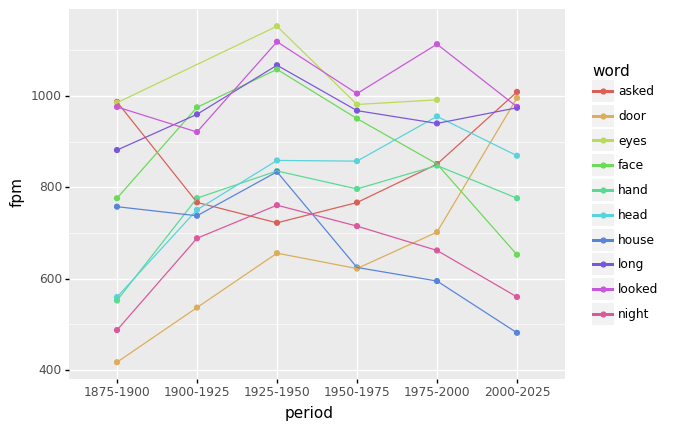

<ggplot: (8746270177037)>

In [21]:
# plot overall top 10 words over the separate periods, where a period is a decade
import plotnine as p9
fig=p9.ggplot(
    p9.aes(x='period',y='fpm',color='word'),
    data=C.mfw_df(n=10, yearbin=25, keep_periods=True, excl_stopwords=True, excl_top=100)
)
fig+=p9.geom_point()
fig+=p9.geom_line(p9.aes(group='word'))
fig

In [22]:
C.mdw('gender')


,F,M
word,,
lilies,0.001713,0.000000
peas,0.001662,0.000000
petals,0.001566,0.000000
vase,0.001523,0.000000
drowsy,0.001467,0.000000
...,...,...
retreated,0.000000,0.000454
causes,0.000000,0.000404
disposed,0.000000,0.000514


In [23]:
C.mdw('nation')

,American,American|Afghani,American|Canadian,American|Russian,Australian,Austrian-Bohemian,British,British|Indian,Canadian,English,...,Polish,Russian,Russian|American,Scottish,South African,Spanish,Swedish,Trinidadian|English,Welsh,Welsh|English
word,,,,,,,,,,,,,,,,,,,,,
skipped,0.001113,0.003338,0.001113,0.000000,0.000000,0.001113,0.000000,0.002782,0.000000,0.0,...,0.000000,0.000000,0.001113,0.001113,0.000000,0.000000,0.004451,0.001669,0.001113,0.000000
handles,0.001077,0.001077,0.002155,0.001077,0.001077,0.000000,0.001077,0.001616,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
scrape,0.001057,0.000000,0.001057,0.000528,0.000000,0.000000,0.000000,0.000528,0.000000,0.0,...,0.000528,0.000000,0.000528,0.001057,0.001057,0.000000,0.000000,0.002642,0.002114,0.000000
depending,0.001036,0.002072,0.001036,0.000000,0.000000,0.000000,0.000000,0.002072,0.000000,0.0,...,0.000518,0.000000,0.002590,0.000000,0.000000,0.000000,0.001036,0.000518,0.000000,0.000000
warming,0.000959,0.000959,0.000959,0.000000,0.000959,0.000959,0.002877,0.000959,0.000479,0.0,...,0.000000,0.000959,0.000479,0.000959,0.000000,0.000959,0.000000,0.000000,0.000959,0.000959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
plots,0.000000,0.002737,0.000000,0.000000,0.000000,0.002737,0.000000,0.001368,0.000000,0.0,...,0.001368,0.013683,0.000000,0.002737,0.000000,0.008210,0.000000,0.000000,0.000000,0.000000
indefinitely,0.000000,0.000000,0.000000,0.001279,0.000000,0.000000,0.000000,0.002559,0.000000,0.0,...,0.001279,0.005118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
architectural,0.000000,0.000000,0.000000,0.000000,0.000000,0.005954,0.000000,0.002977,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001489,0.000000,0.000000


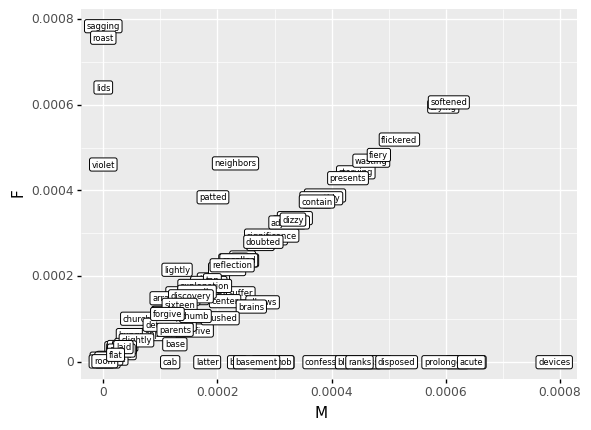

<ggplot: (8746216965393)>

In [32]:
p9.ggplot(
    p9.aes(x='M',y='F',label='word'),
    data=C.mdw('gender').reset_index().sample(n=100)
) + p9.geom_point() + p9.geom_label(size=6)# + p9.scale_y_log10() + p9.scale_x_log10()